In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io, morphology, segmentation
from skimage.filters import sobel
from skimage.color import rgb2gray
from skimage.segmentation import active_contour
from sklearn.cluster import MeanShift, estimate_bandwidth

global init_list
init_list = []

In [2]:
# Load the image
image = io.imread('coin.jpg')
# Convert the image to grayscale
gray_image = rgb2gray(image)
edges = sobel(gray_image)
cv2.imshow("edges",edges)
cv2.waitKey(0)

-1

In [3]:
def drawinit(action, x, y, flags, *userdata):
    global init_list
    if action == cv2.EVENT_LBUTTONDOWN:
        init_list.append([x,y])
        init = np.array(init_list)
        cv2.drawContours(gray_image, [init], 0, (255,255,255), 2)
        cv2.imshow("gray_image",gray_image)
        

In [4]:

# Apply edge detection using the Sobel filter
while True:
    cv2.imshow('gray_image',gray_image)
    k = cv2.waitKey(0)
    if (k == ord('d')):
        cv2.setMouseCallback("gray_image", drawinit)
    if (k == ord('q')):
        cv2.destroyAllWindows()
        break
# Create an initial contour as a circle around the object
# x, y = np.meshgrid(np.linspace(0, image.shape[1]-1, 100),
#                    np.linspace(0, image.shape[0]-1, 100))
# init = np.array([x.ravel(), y.ravel()]).T
#init = segmentation.find_boundaries(edges)

In [6]:
# Define the parameters for the Snake model
alpha = 123
beta = 1
gamma = 1200
max_iterations = 500

# Run the Snake model
#print(init_list)
init = np.array(init_list)
# snake = active_contour(edges, init, alpha = alpha, beta = beta, gamma = gamma,
#                        max_num_iter=max_iterations)
snake = active_contour(image, init)
# # Plot the results
fig, ax = plt.subplots(figsize=(9, 5))
ax.imshow(image, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--r', lw=1)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, image.shape[1], image.shape[0], 0])

plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [7]:
image = io.imread('watershed.jpg')
imagergb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(imagergb,cv2.COLOR_BGR2GRAY)
cv2.imshow('image',imagergb)
cv2.waitKey(0)
cv2.imshow('gray',gray)
cv2.waitKey(0)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
print(ret)
cv2.imshow('thresh',thresh)
cv2.waitKey(0)
# Apply median to remove small objects from the foreground
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)
cv2.imshow('opening',opening)
cv2.waitKey(0)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
cv2.imshow('sure_bg',sure_bg)
cv2.waitKey(0)
# Apply distance transform to find the distance to the nearest zero pixel for each pixel in the foreground
dist_transform = cv2.distanceTransform(opening ,cv2.DIST_L2,5)
cv2.imshow('dist_transform',dist_transform)
cv2.waitKey(0)
# Apply thresholding to obtain the foreground markers
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
cv2.imshow('fg_markers',sure_fg)
cv2.waitKey(0)


sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==255] = 0

markers = cv2.watershed(image,markers)
print(markers)
segmented = np.zeros_like(image)
segmented[markers == -1] = [255,0,0]  # Mark watershed boundary with blue color
segmented[markers == 1] = [0,255,0]   # Mark foreground objects with green color
segmented[markers == 2] = [0,0,255]   # Mark background objects with red color
cv2.imshow('Segmented Image',segmented)
cv2.waitKey(0)
cv2.destroyAllWindows()




162.0
[[-1 -1 -1 ... -1 -1 -1]
 [-1  1  1 ...  1  1 -1]
 [-1  1  1 ...  1  1 -1]
 ...
 [-1  1  1 ...  1  1 -1]
 [-1  1  1 ...  1  1 -1]
 [-1 -1 -1 ... -1 -1 -1]]


In [8]:
image = cv2.imread('lose.png')
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [9]:
global k
def returnK(value = 3):
    global k
    k = value


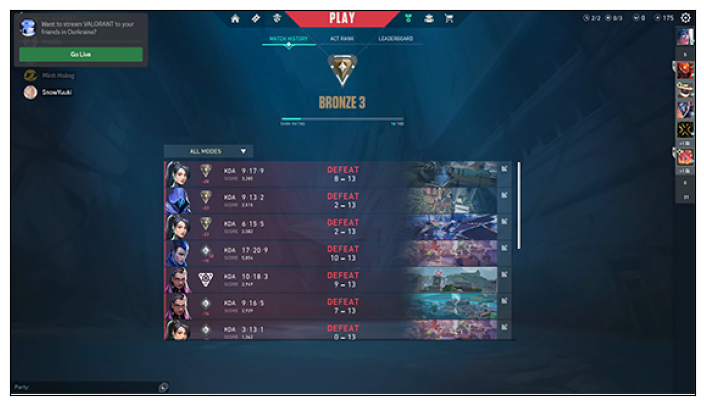

In [10]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.imshow(image, cmap=plt.cm.gray)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, image.shape[1], image.shape[0], 0])

plt.show()

In [11]:

cv2.namedWindow('kmean')

# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
 
# Convert to float type
pixel_vals = np.float32(pixel_vals)

#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
while True:
    cv2.createTrackbar('slider', 'kmean', 2, 50, returnK)
    key = cv2.waitKey(0)
    retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    # convert data into 8-bit values
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]
 
    # reshape data into the original image dimensions
    segmented_image = segmented_data.reshape((image.shape))
    segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)
    if (key == ord('q')):
        cv2.destroyAllWindows()
        break
    cv2.imshow('kmean',segmented_image)

In [ ]:
# def euclidean_distance(x, y):
#     """Calculate the Euclidean distance between two points"""
#     return np.sqrt(np.sum((x - y)**2))

In [ ]:
# def gaussian_kernel(distance, bandwidth):
#     """Calculate the Gaussian kernel"""
#     return (1/(bandwidth * np.sqrt(2*np.pi))) * np.exp(-(distance**2)/(2*bandwidth**2))

In [ ]:
# def mean_shift(x,y, image, bandwidth):
#     """Calculate the mean shift vector"""
#     shifted_pixel = np.zeros_like(image[x][y])
#     weight_sum = 0
    
#     for i in range((bandwidth-1)/-2,(bandwidth-1)/2):
#         for j in range((bandwidth-1)/-2,(bandwidth-1)/2):
#             if (x+i in range(0,image.shape[0])) and (j+i in range(0,image.shape[1])):
#                 # tim mean location
#                 # the thi se ntn neu ko co pixel nao chua gia tri mean? tuong phai tim mode chu nhi
#                 pass
#                 # calculate vi tri cua mean moi

#     #shifted_pixel /= weight_sum

#     return shifted_pixel

In [ ]:

# def mean_shift_segmentation(image, bandwidth, num_iterations=5):
#     """Perform Mean Shift segmentation on the image"""
#     # Reshape the image to a 2D array of pixels
#     flat_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#     # Iterate over each pixel and apply Mean Shift
#     for i in range(num_iterations):
#         for j in range(flat_image.shape[0]):
#             for k in range(flat_image.shape[1]):
#                 flat_image[j][k] = mean_shift(j,k, flat_image, bandwidth)

#     # Reshape the pixel values back to the shape of the original image
#     #segmented_image = np.reshape(flat_image, image.shape)

#     return segmented_image


In [12]:
# Load the image
img = cv2.imread('small.png')

# Reshape the image to a 2D array of pixels
flat_image = np.reshape(img, [-1, 3])

# Estimate the bandwidth
bandwidth = estimate_bandwidth(flat_image, quantile=0.1, n_samples=100)

# Apply Mean Shift segmentation
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, max_iter=1)
ms.fit(flat_image)

# Get the labels assigned to each pixel
labels = ms.labels_

# Reshape the labels to the shape of the original image
result = np.reshape(labels,img.shape[:2])   
segmented = cv2.convertScaleAbs(result)

# Display the segmented image
cv2.imshow('Segmented Image', segmented)
cv2.waitKey(0)

-1